데이터
1. 제5회_대구은행_카드데이터(202212).csv
  - 고객ID : 코객코드
  - 가맹점업종코드 : 업종코드
  - 가맹점업종명 : 가맹점명
  - 승인금액 : 금액
  - 승인건수 : 건수 분류(범주형)

2. BC카드가맹점업종코드.xlsx -> BC카드가맹점업종코드_라벨.xlsx (업종대분류 변수 생성)
  - 가맹점업종 : 업종코드
  - 분류 : 업종대분류(추가한 변수)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

import re
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# plt 시각화 한글깨짐을 해결하기위해 시스템에 있는 폰트확인
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\WINDOWS\\Fonts\\comicz.ttf',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\TEMPSITC.TTF',
 'C:\\WINDOWS\\Fonts\\HMKMRHD.TTF',
 'C:\\Windows\\Fonts\\LFAX.TTF',
 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF',
 'C:\\WINDOWS\\Fonts\\MAIAN.TTF',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\Windows\\Fonts\\constani.ttf',
 'C:\\WINDOWS\\Fonts\\cour.ttf',
 'C:\\Windows\\Fonts\\CALIFB.TTF',
 'C:\\WINDOWS\\Fonts\\LBRITED.TTF',
 'C:\\Windows\\Fonts\\cour.ttf',
 'C:\\WINDOWS\\Fonts\\MAGNETOB.TTF',
 'C:\\WINDOWS\\Fonts\\BRUSHSCI.TTF',
 'C:\\Windows\\Fonts\\HANBatangB.ttf',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\calibrii.ttf',
 'C:\\WINDOWS\\Fonts\\consola.ttf',
 'C:\\Windows\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\ONYX.TTF',
 'C:\\Windows\\Fonts\\FTLTLT.TTF',
 'C:\\Windows\\Fonts\\RAGE.TTF',
 'C:\\WINDOWS\\Fonts\\ANTQUABI.TTF',
 'C:\\WINDOWS\\Fonts\\LFAXD.TTF',
 'C:\\WINDOWS\\Fonts\\GILSANUB.TTF',
 'C:\\WINDOWS\\Fonts\\arialbi.ttf',
 'C:\\Windows\\Fonts\\Inkfree.ttf',
 'C:\\

In [ ]:
# 폰트 설정
font_path =  'C:\\WINDOWS\\Fonts\\KBIZ한마음고딕 M.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
# path를 자신의 경로에 맞게 지정
df = pd.read_csv(r"C:\Users\빅데이터활용센터\daegu\data\제5회_대구은행_카드데이터(202212).csv", encoding="EUC-kr")

In [ ]:
# path를 자신의 경로에 맞게 지정
df_code = pd.read_excel(r"C:\Users\빅데이터활용센터\daegu\BC카드가맹점업종코드_라벨.xlsx")

변수명 수정 및 필요없는 변수 제거

In [ ]:
df_code.rename(columns={"가맹점업종" : "가맹점업종코드"}, inplace=True)
df_code.drop(["가맹점분류1", "가맹점분류2", "가맹점업종명"], axis=1, inplace=True)

In [ ]:
df.head(3)

,거래년월,고객ID,가맹점업종코드,가맹점업종명,사업장우편번호,승인금액,승인건수
0,202212,339608777,2101,골프경기장,41907,110000,5번이하
1,202212,339608777,2130,노 래 방,41946,90000,5번이하
2,202212,339608777,2240,애완동물,42115,100000,5번이하


In [ ]:
df_code.head(3)

,가맹점업종코드,분류
0,1001,여행
1,1002,여행
2,1003,여행


In [ ]:
data = pd.merge(df, df_code, on="가맹점업종코드", how="left")

결측치 확인 및 제거

In [ ]:
data.isnull().sum()

거래년월           0
고객ID           0
가맹점업종코드        0
가맹점업종명         0
사업장우편번호        0
승인금액           0
승인건수           0
분류         28320
dtype: int64

In [ ]:
data_index = data[data["분류"].isnull()].index

'분류'가 NULL값인 가맹점업종명 확인 (BC카드가맹점업종코드’에 제시되지 않은 가맹점 업종명 확인)

In [ ]:
data.iloc[data_index, :]["가맹점업종명"].unique()

array(['PG상품권', '전기차충전소'], dtype=object)

In [ ]:
data.drop(data_index, axis=0, inplace=True)

In [ ]:
data.isnull().sum()

거래년월       0
고객ID       0
가맹점업종코드    0
가맹점업종명     0
사업장우편번호    0
승인금액       0
승인건수       0
분류         0
dtype: int64

'기타' 업종대분류에 속하는 가맹점 업종명 확인

In [ ]:
data_result = data[data["분류"]=="기타"]["가맹점업종명"].value_counts()

In [ ]:
count_list = data_result.tolist()
label_list = data_result.index.tolist()

([<matplotlib.patches.Wedge at 0x21b2589c9d0>,
 [Text(-1.051062508880411, -0.32444969167193854, '기타 전문점'),
  Text(0.5941771408290231, -0.9257178432526012, '비씨카드 정산용(할인)'),
  Text(1.0936002116806451, 0.11848450114697859, '이동통신요금'),
  Text(0.9586014169954031, 0.5395213835747434, '사무서비스'),
  Text(0.7805902534722505, 0.7750347451463889, '공공요금대행서비스/소득공제대상'),
  Text(0.6013668772715426, 0.9210634499971615, '세탁소'),
  Text(0.4478705788406808, 1.0046949510219079, '공공요금대행서비스/소득공제비대상'),
  Text(0.295236007733891, 1.0596394196788612, '기계공구'),
  Text(0.1578675156757713, 1.0886128088050224, '일반(통신판매)'),
  Text(0.053600690867709, 1.0986932993053633, '상 품 권'),
  Text(-0.026169590904725586, 1.0996886616274077, '업종미등록'),
  Text(-0.09655784874965025, 1.0957538874422668, '목재·석재·철물'),
  Text(-0.1621042329882804, 1.0879899896815601, '가정용품수리'),
  Text(-0.2265293994131, 1.076422050685297, '기타건축자재'),
  Text(-0.2886013176366521, 1.0614656280155228, '비영리/대상'),
  Text(-0.3462919284559965, 1.044069873277755, '종합용역')

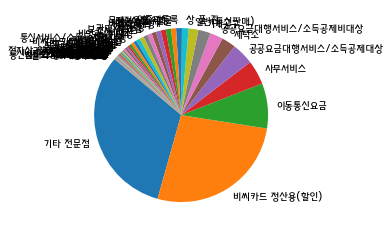

In [ ]:
plt.pie(count_list, labels=label_list, startangle=140)

([<matplotlib.patches.Wedge at 0x21b25dc6e20>,
 [Text(-1.051062508880411, -0.32444969167193854, '기타 전문점'),
  Text(0.5941771408290231, -0.9257178432526012, '비씨카드 정산용(할인)'),
  Text(1.0936002116806451, 0.11848450114697859, '이동통신요금'),
  Text(0.9586014169954031, 0.5395213835747434, '사무서비스'),
  Text(0.7805902534722505, 0.7750347451463889, '공공요금대행서비스/소득공제대상'),
  Text(0.6013668772715426, 0.9210634499971615, '세탁소'),
  Text(0.4478705788406808, 1.0046949510219079, '공공요금대행서비스/소득공제비대상'),
  Text(0.295236007733891, 1.0596394196788612, '기계공구'),
  Text(0.1578675156757713, 1.0886128088050224, '일반(통신판매)'),
  Text(0.053600690867709, 1.0986932993053633, '상 품 권'),
  Text(-0.026169590904725586, 1.0996886616274077, '업종미등록'),
  Text(-0.09655784874965025, 1.0957538874422668, '목재·석재·철물'),
  Text(-0.1621042329882804, 1.0879899896815601, '가정용품수리'),
  Text(-0.2265293994131, 1.076422050685297, '기타건축자재'),
  Text(-0.2886013176366521, 1.0614656280155228, '비영리/대상'),
  Text(-0.3462919284559965, 1.044069873277755, '종합용역')

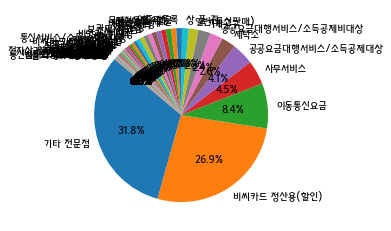

In [ ]:
plt.pie(count_list, labels=label_list, autopct="%1.1f%%", startangle=140)

'기타'업종의 과반수를 차지하고 있는 기타 전문점 및 비씨카드 정산용(할인)의 경우 어떤 사업을 영위하고 있는지 확인하기 어려웠다.

따라서 개인화된 뉴스를 추천해 줄 수 없는 결제데이터라 생각하여 '기타'업종을 삭제했다.

In [ ]:
data.drop(data[data["분류"]=="기타"].index, axis=0, inplace=True)

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data["분류"].unique()

array(['취미', '생활', '패션_뷰티', '의료', '외식', 'IT_전자_자동차', '여행', '교육'],
      dtype=object)

## '승인건수' 변수를 수치형 데이터로 변환

승인건수가 범주형으로 되어있어 수치형으로 환산해주기 위해 평균 값으로 적용시켜주었다.

'5번이하’의 경우, 대응하는 승인금액이 0인 경우에는 0으로 설정하고 그 외에는 0과 5의 평균인 2.5로 환산하였다.

‘20번 초과’는 평균처리를 해줄 수 없기에 다른 방식으로 환산하였다.
1. 승인건수가 ‘20번 초과’가 아닌 데이터에서 업종대분류별 ‘승인금액’, ‘승인건수-수치’의 합을 groupby 메소드를 통해 집계
2. 집계된 데이터 프레임에서 ‘승인금액’의 합을 ‘승인건수_수치’의 합으로 나눈 ‘건당_승인금액’ 변수를 생성
3. 승인건수가 ‘20번 초과’인 고객의 ‘승인건수_수치’를 ‘승인금액 / 건당_승인금액’으로 대체하였고 그 값이 21보다 작은 경우, 21로 설정


5번 이하 -> 0 or 2.5

5번 초과 10번 이하 -> 7.5

10번 초과 15번 이하 -> 12.5

15번 초과 20번 이하 -> 17.5

20번 초과 -> 21~

In [ ]:
data["승인건수"].unique()

array(['5번이하', '5번초과 10번이하', '15번초과 20번이하', '20번 초과', '10번초과 15번이하'],
      dtype=object)

In [ ]:
# 승인건수 범주형 -> 수치형 환산
def convert_avg(value):
    def extract_avg(input):
        numbers = re.findall(r'\d+', input)
        numeric_numbers = [int(num) if num.isdigit() else float(num) for num in numbers]
        avg = np.average(numeric_numbers)
        return avg

    if '초과' in value and '이하' in value:
        tmp = extract_avg(value)
    elif '이하' in value:
        tmp = np.average([0, extract_avg(value)])
    else:
        tmp = 'tmp'
    return tmp

In [ ]:
data['승인건수_수치'] = data['승인건수'].apply(lambda x: convert_avg(x))

In [ ]:
data.head(10)

,거래년월,고객ID,가맹점업종코드,가맹점업종명,사업장우편번호,승인금액,승인건수,분류,승인건수_수치
0,202212,339608777,2101,골프경기장,41907,110000,5번이하,취미,2.5
1,202212,339608777,2130,노 래 방,41946,90000,5번이하,취미,2.5
2,202212,339608777,2240,애완동물,42115,100000,5번이하,취미,2.5
3,202212,339608777,3305,SK주유소,41161,70000,5번이하,생활,2.5
4,202212,339608777,3305,SK주유소,41572,50000,5번이하,생활,2.5
5,202212,339608777,3305,SK주유소,42410,70000,5번이하,생활,2.5
6,202212,339608777,3307,GS주유소,41905,210000,5번이하,생활,2.5
7,202212,492398322,4020,슈퍼마켓,41722,90000,5번이하,생활,2.5
8,202212,339608777,3307,GS주유소,42032,70000,5번이하,생활,2.5
9,202212,339608777,3308,현대정유(오일뱅크),41904,350000,5번이하,생활,2.5


In [ ]:
# '승인건수'가 '20번 초과'가 아닌 데이터프레임에서 '분류'별 승인금액, 승인건수_수치의 합을 집계한 데이터프레임 변수 할당
tmp_group = data[data['승인건수_수치']!='tmp'].groupby('분류')['승인금액', '승인건수_수치'].agg({'승인금액': 'sum', '승인건수_수치': 'sum'})

<ipython-input-28-6ef3be9a0798>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp_group = data[data['승인건수_수치']!='tmp'].groupby('분류')['승인금액', '승인건수_수치'].agg({'승인금액': 'sum', '승인건수_수치': 'sum'})


In [ ]:
# '건당_승인금액' 변수 생성
tmp_group['건당_승인금액'] = tmp_group['승인금액'] / tmp_group['승인건수_수치']

In [ ]:
tmp_group.drop(["승인금액", "승인건수_수치"], axis=1, inplace=True)

In [ ]:
data2 = pd.merge(data, tmp_group,  on='분류', how='left')

In [ ]:
data2.head(3)

,거래년월,고객ID,가맹점업종코드,가맹점업종명,사업장우편번호,승인금액,승인건수,분류,승인건수_수치,건당_승인금액
0,202212,339608777,2101,골프경기장,41907,110000,5번이하,취미,2.5,20850.189037
1,202212,339608777,2130,노 래 방,41946,90000,5번이하,취미,2.5,20850.189037
2,202212,339608777,2240,애완동물,42115,100000,5번이하,취미,2.5,20850.189037


In [ ]:
# 'tmp' 변수 생성
data2['tmp'] = data2['승인금액'] / data2['건당_승인금액']

In [ ]:
data2.head(3)

,거래년월,고객ID,가맹점업종코드,가맹점업종명,사업장우편번호,승인금액,승인건수,분류,승인건수_수치,건당_승인금액,tmp
0,202212,339608777,2101,골프경기장,41907,110000,5번이하,취미,2.5,20850.189037,5.275732
1,202212,339608777,2130,노 래 방,41946,90000,5번이하,취미,2.5,20850.189037,4.316508
2,202212,339608777,2240,애완동물,42115,100000,5번이하,취미,2.5,20850.189037,4.796120


In [ ]:
# 'tmp' 변수 값이 21보다 작으면 원래 21로 설정
data2.loc[data2['tmp'] < 21, 'tmp'] = 21

In [ ]:
# '승인건수'가 '20번 초과'에 해당하는 고객들의 '승인건수'를 모두 수치화하였다.
data2.loc[data2['승인건수']=='20번 초과', '승인건수_수치'] = data2['tmp']

In [ ]:
# '승인건수'가 '5번이하'의 경우, '승인금액'이 0일 때 '승인건수_수치'를 0으로 변경
data2.loc[data2['승인금액']==0,'승인건수_수치'] = 0

In [ ]:
# 필요없는 변수 제거
data2.drop(["거래년월", "가맹점업종코드", "가맹점업종명", "사업장우편번호", "승인건수", "건당_승인금액", "tmp"], axis=1, inplace=True)

In [ ]:
data2.head(3)

,고객ID,승인금액,분류,승인건수_수치
0,339608777,110000,취미,2.5
1,339608777,90000,취미,2.5
2,339608777,100000,취미,2.5


In [ ]:
pt_승인금액 = pd.pivot_table(data2, values='승인금액', index='고객ID', columns='분류', aggfunc='sum')
pt_승인건수 = pd.pivot_table(data2, values='승인건수_수치', index='고객ID', columns='분류', aggfunc='sum')

## 업종별 고객 승인금액 현황 및 업종별 고객 승인건수 현황 시각화

In [ ]:
tmp_승인금액 = pt_승인금액.rename(columns={'IT_전자_자동차':'IT_전자_자동차_승인금액',
                               '교육':'교육_승인금액',
                               '생활':'생활_승인금액',
                               '여행':'여행_승인금액',
                               '외식':'외식_승인금액',
                               '의료':'의료_승인금액',
                               '취미':'취미_승인금액',
                               '패션_뷰티':'패션_뷰티_승인금액'})
tmp_승인건수 = pt_승인건수.rename(columns={'IT_전자_자동차':'IT_전자_자동차_승인건수',
                               '교육':'교육_승인건수',
                               '생활':'생활_승인건수',
                               '여행':'여행_승인건수',
                               '외식':'외식_승인건수',
                               '의료':'의료_승인건수',
                               '취미':'취미_승인건수',
                               '패션_뷰티':'패션_뷰티_승인건수'})

In [ ]:
df_1 = pd.concat([tmp_승인금액, tmp_승인건수], axis=1).fillna(0)

In [ ]:
df_1.to_csv('client_금액_건수.csv', encoding='utf-8-sig')

In [ ]:
df_1 = pd.read_csv('client_금액_건수.csv')

In [ ]:
분류별_승인금액_합 = df_1.iloc[:,1:9].sum()
분류별_승인건수_합 = df_1.iloc[:,9:].sum()

In [ ]:
df2 = pd.DataFrame({'업종': ['IT_전자_자동차', '교육','생활','여행','외식','의료','취미','패션_뷰티'], '승인금액': 분류별_승인금액_합.values})
df2_sorted = df2.sort_values(by='승인금액', ascending=False)


plt.figure(figsize=(5, 6))
plt.bar(df2_sorted['업종'], df2_sorted['승인금액'], color='red')
plt.xlabel('업종')
plt.ylabel('승인금액 합')
plt.title('업종별 고객 승인금액 현황')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

total_approved = df2_sorted['승인금액'].sum()

bars = plt.bar(df2_sorted['업종'], df2_sorted['승인금액'], color='red')
for bar in bars:
    height = bar.get_height()
    ratio = height / total_approved
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'{ratio:.0%}', ha='center', color='black')

plt.show()

In [ ]:
df3 = pd.DataFrame({'업종': ['IT_전자_자동차', '교육','생활','여행','외식','의료','취미','패션_뷰티'], '승인건수': 분류별_승인건수_합.values})
df3_sorted = df3.sort_values(by='승인건수', ascending=False)


plt.figure(figsize=(5, 6))
plt.bar(df3_sorted['업종'], df3_sorted['승인건수'], color='red')
plt.xlabel('업종')
plt.ylabel('승인건수 합')
plt.title('업종별 고객 승인건수 현황')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

bars = plt.bar(df3_sorted['업종'], df3_sorted['승인건수'], color='red')
total_approved = df3_sorted['승인건수'].sum()

for bar in bars:
    height = bar.get_height()
    ratio = height / total_approved
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'{ratio:.0%}', ha='center', color='black')

plt.show()

In [ ]:
pt_승인금액 = pt_승인금액.fillna(0)
pt_승인건수 = pt_승인건수.fillna(0)

## 특정 고객이 전체 고객 대비 해당 업종에 얼마나 결제를 했는지를 관심도로 선정하여 고객 Feature Vector 생성

### 수식-1
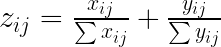

x: 승인금액, y: 승인건수, i: 고객 index, j: 업종대분류 index(0~7)

In [ ]:
for i in pt_승인금액.columns:
    pt_승인금액[i] = pt_승인금액[i] / pt_승인금액[i].sum()
for i in pt_승인건수.columns:
    pt_승인건수[i] = pt_승인건수[i] / pt_승인건수[i].sum()

In [ ]:
client_feature = pt_승인금액.add(pt_승인건수)

### 수식-2
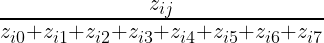

In [ ]:
client_feature['row_sum'] = client_feature.sum(axis=1)

In [ ]:
for i in client_feature.columns:
    client_feature[i] = client_feature[i] / client_feature['row_sum']

In [ ]:
client_feature.drop('row_sum', axis=1, inplace=True)

In [ ]:
client_feature

분류,IT_전자_자동차,교육,생활,여행,외식,의료,취미,패션_뷰티
고객ID,,,,,,,,
200001351,0.402504,0.000000,0.010102,0.219834,0.140320,0.000000,0.227240,0.000000
200004132,0.000000,0.000000,0.162976,0.000000,0.096085,0.032402,0.628817,0.079721
200004601,0.000000,0.000000,0.100042,0.000000,0.351386,0.000000,0.000000,0.548571
200005514,0.000000,0.000000,0.073351,0.000000,0.302408,0.000000,0.624241,0.000000
200006021,0.553392,0.000000,0.141997,0.048074,0.027693,0.000000,0.076986,0.151858
...,...,...,...,...,...,...,...,...
999995095,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
999995567,0.000000,0.000000,0.412741,0.000000,0.000000,0.000000,0.587259,0.000000
999996816,0.000000,0.000000,0.096495,0.108647,0.099314,0.437221,0.000000,0.258323


In [ ]:
df_copy = client_feature.copy()
df_copy.head()

분류,IT_전자_자동차,교육,생활,여행,외식,의료,취미,패션_뷰티
고객ID,,,,,,,,
200001351,0.402504,0.0,0.010102,0.219834,0.140320,0.000000,0.227240,0.000000
200004132,0.000000,0.0,0.162976,0.000000,0.096085,0.032402,0.628817,0.079721
200004601,0.000000,0.0,0.100042,0.000000,0.351386,0.000000,0.000000,0.548571
200005514,0.000000,0.0,0.073351,0.000000,0.302408,0.000000,0.624241,0.000000
200006021,0.553392,0.0,0.141997,0.048074,0.027693,0.000000,0.076986,0.151858


In [ ]:
client_feature['IT_전자_자동차'] = df_copy['여행']
client_feature['교육'] = df_copy['취미']
client_feature['생활'] = df_copy['IT_전자_자동차']
client_feature['여행'] = df_copy['생활']
client_feature['외식'] = df_copy['패션_뷰티']
client_feature['의료'] = df_copy['교육']
client_feature['취미'] = df_copy['의료']
client_feature['패션_뷰티'] = df_copy['외식']

In [ ]:
client_feature = client_feature.rename(columns={'IT_전자_자동차':'여행',
                               '교육':'취미',
                               '생활':'IT_전자_자동차',
                               '여행':'생활',
                               '외식':'패션_뷰티',
                               '의료':'교육',
                               '취미':'의료',
                               '패션_뷰티':'외식'})

## 고객 Feature Vector 데이터프레임

In [ ]:
client_feature.head(10)

분류,여행,취미,IT_전자_자동차,생활,패션_뷰티,교육,의료,외식
고객ID,,,,,,,,
200001351,0.219834,0.227240,0.402504,0.010102,0.000000,0.0,0.000000,0.140320
200004132,0.000000,0.628817,0.000000,0.162976,0.079721,0.0,0.032402,0.096085
200004601,0.000000,0.000000,0.000000,0.100042,0.548571,0.0,0.000000,0.351386
200005514,0.000000,0.624241,0.000000,0.073351,0.000000,0.0,0.000000,0.302408
200006021,0.048074,0.076986,0.553392,0.141997,0.151858,0.0,0.000000,0.027693
200007203,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
200007404,0.000000,0.000000,0.000000,0.172281,0.000000,0.0,0.827719,0.000000
200009319,0.093632,0.380982,0.000000,0.066941,0.234598,0.0,0.032754,0.191094
200011167,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
client_feature.tail(10)

분류,여행,취미,IT_전자_자동차,생활,패션_뷰티,교육,의료,외식
고객ID,,,,,,,,
999988513,0.000000,0.000000,0.000000,0.323856,0.000000,0.000000,0.430046,0.246098
999988566,0.000000,0.700578,0.000000,0.299422,0.000000,0.000000,0.000000,0.000000
999990187,0.000000,0.176442,0.000000,0.098775,0.000000,0.697767,0.000000,0.027016
999990338,0.000000,0.000000,0.771308,0.011310,0.000000,0.000000,0.148470,0.068911
999991351,0.000000,0.000000,0.000000,0.503100,0.000000,0.000000,0.496900,0.000000
999995095,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
999995567,0.000000,0.587259,0.000000,0.412741,0.000000,0.000000,0.000000,0.000000
999996816,0.108647,0.000000,0.000000,0.096495,0.258323,0.000000,0.437221,0.099314
999997013,0.059187,0.000000,0.206210,0.055209,0.000000,0.425028,0.079234,0.175132


In [ ]:
def row_to_list(row):
    return row.tolist()

client_feature['feature'] = client_feature.apply(row_to_list, axis=1)

In [ ]:
client_feature_vector.head(10)

분류,feature
고객ID,
200001351,"[0.21983447218149602, 0.22723964588862774, 0.4..."
200004132,"[0.0, 0.6288165131188993, 0.0, 0.1629758591902..."
200004601,"[0.0, 0.0, 0.0, 0.10004240573134313, 0.5485713..."
200005514,"[0.0, 0.6242408209490847, 0.0, 0.0733512790819..."
200006021,"[0.04807437933778104, 0.07698601745367026, 0.5..."
200007203,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
200007404,"[0.0, 0.0, 0.0, 0.17228120727252727, 0.0, 0.0,..."
200009319,"[0.09363204720031261, 0.38098155223796726, 0.0..."
200011167,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
client_feature_vector.tail(10)

분류,feature
고객ID,
999988513,"[0.0, 0.0, 0.0, 0.32385585688220164, 0.0, 0.0,..."
999988566,"[0.0, 0.7005779558065435, 0.0, 0.2994220441934..."
999990187,"[0.0, 0.17644169720832587, 0.0, 0.098775271994..."
999990338,"[0.0, 0.0, 0.7713084183644819, 0.0113100703943..."
999991351,"[0.0, 0.0, 0.0, 0.5031004570332722, 0.0, 0.0, ..."
999995095,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
999995567,"[0.0, 0.587259216684676, 0.0, 0.41274078331532..."
999996816,"[0.1086467661274326, 0.0, 0.0, 0.0964946145662..."
999997013,"[0.05918726330099666, 0.0, 0.20621040960775855..."
